In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv("train.csv", index_col=0)
print(df.columns)
df = df.drop(["Cabin","Name","Ticket"], axis=1)
df

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [41]:
df1 = df["Sex"]
df_dummy = pd.get_dummies(df1,drop_first=True)
df["Sex_M"] = df_dummy #Male is one
df = df.drop(columns=["Sex"])
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_M
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1
2,1,1,38.0,1,0,71.2833,C,0
3,1,3,26.0,0,0,7.9250,S,0
4,1,1,35.0,1,0,53.1000,S,0
5,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,S,1
888,1,1,19.0,0,0,30.0000,S,0
889,0,3,NaN,1,2,23.4500,S,0


In [42]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Sex_M         0
dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(lambda col: LabelEncoder().fit_transform(df["Embarked"]) if col.dtype == "object" else col)
df.head(15)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_M
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,2,1
2,1,1,38.0,1,0,71.2833,0,0
3,1,3,26.0,0,0,7.9250,2,0
4,1,1,35.0,1,0,53.1000,2,0
5,0,3,35.0,0,0,8.0500,2,1
6,0,3,NaN,0,0,8.4583,1,1
7,0,1,54.0,0,0,51.8625,2,1
8,0,3,2.0,3,1,21.0750,2,1
9,1,3,27.0,0,2,11.1333,2,0


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_M         0
dtype: int64

In [7]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan, mean, std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
# load dataset
# split into input and output elements
data = df.values
ix = [i for i in range(data.shape[1]) if i != 9]
X, y = data[:, ix], data[:, 7]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
#define modeling pipeline
## model = svm.SVC(kernel='rbf', degree =3, gamma = 0.01, C = 100, max_iter=-1, random_state = 262)
model = XGBClassifier(use_label_encoder=False, base_score=0.25, booster='gbtree', eta=0.3, max_depth=4, min_child_weight=20,
                    max_delta_step=0.5, subsample=0.6, colsample_bytree=1, colsample_bylevel=0.7, colsample_bynode=1, 
                    reg_lambda=1, reg_alpha=1, tree_method="approx", sketch_eps=0.1, scale_pos_weight=1.6, 
                    objective="binary:logitraw", gamma=0, n_estimators=10, rate_drop="0.01", skip_drop="0.8",
                    random_state = 262)
# fit on the dataset
imputer.fit(X)
# transform the dataset
df = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(df).flatten()))
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Missing: 177
Missing: 0
Mean Accuracy: 1.000 (0.000)


In [ ]:
#KNN imputer
from numpy import isnan
from sklearn.impute import KNNImputer
# split into input and output elements
data = df.values
ix = [i for i in range(data.shape[1]) if i != 9]
X, y = data[:, ix], data[:, 7]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
df = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(df).flatten()))


In [8]:
df = pd.DataFrame(df)
df.columns = ["Survived","Pclass","Age","SibSp","Parch","Fare","Embarked","Sex_M"]
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_M
0,0.0,3.0,22.000000,1.0,0.0,7.2500,2.0,1.0
1,1.0,1.0,38.000000,1.0,0.0,71.2833,0.0,0.0
2,1.0,3.0,26.000000,0.0,0.0,7.9250,2.0,0.0
3,1.0,1.0,35.000000,1.0,0.0,53.1000,2.0,0.0
4,0.0,3.0,35.000000,0.0,0.0,8.0500,2.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000,2.0,1.0
887,1.0,1.0,19.000000,0.0,0.0,30.0000,2.0,0.0
888,0.0,3.0,23.388746,1.0,2.0,23.4500,2.0,0.0
889,1.0,1.0,26.000000,0.0,0.0,30.0000,0.0,1.0


In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Sex_M       0
dtype: int64

In [44]:
X = df[["Pclass","Fare","Embarked","Sex_M"]]
X

,Pclass,Fare,Embarked,Sex_M
PassengerId,,,,
1,3,7.2500,2,1
2,1,71.2833,0,0
3,3,7.9250,2,0
4,1,53.1000,2,0
5,3,8.0500,2,1
...,...,...,...,...
887,2,13.0000,2,1
888,1,30.0000,2,0
889,3,23.4500,2,0


In [45]:
y = df[["Survived"]]
y

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [46]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=262)
X_train

,Pclass,Fare,Embarked,Sex_M
PassengerId,,,,
260,2,26.0000,2,0
124,2,13.0000,2,0
453,1,27.7500,0,1
643,3,27.9000,2,0
337,1,66.6000,2,1
...,...,...,...,...
340,1,35.5000,2,1
592,1,78.2667,0,0
559,1,79.6500,2,0


In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mmsc = MinMaxScaler()
sc = StandardScaler()
X_train = mmsc.fit_transform(X_train)
X_test = mmsc.transform(X_test)
X_test

array([[1.        , 0.01546857, 0.66666667, 0.        ],
       [1.        , 0.0179898 , 0.66666667, 1.        ],
       [1.        , 0.02821272, 0.        , 1.        ],
       [1.        , 0.03025399, 0.33333333, 1.        ],
       [1.        , 0.13575256, 0.66666667, 1.        ],
       [0.5       , 0.02049464, 0.66666667, 1.        ],
       [1.        , 0.03142511, 0.66666667, 1.        ],
       [0.        , 0.05604307, 0.        , 0.        ],
       [1.        , 0.018006  , 0.66666667, 1.        ],
       [1.        , 0.01473662, 0.66666667, 1.        ],
       [0.5       , 0.05123659, 0.66666667, 1.        ],
       [1.        , 0.06104473, 0.66666667, 1.        ],
       [1.        , 0.01537098, 0.66666667, 1.        ],
       [0.        , 0.10149724, 0.66666667, 1.        ],
       [1.        , 0.01571255, 0.66666667, 1.        ],
       [1.        , 0.04006213, 0.66666667, 1.        ],
       [1.        , 0.01510259, 0.33333333, 1.        ],
       [1.        , 0.13575256,

In [50]:
import tensorflow as tf
import keras
tf.__version__

'2.6.0'

In [52]:
from keras.layers import Dropout
### Initializing the ANN
ann = tf.keras.models.Sequential()
### Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))
ann.add(Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
### Compiling the ANN
ann.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
### Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 10, epochs = 200)

Epoch 1/200
76/76 [==============================] - 2s 1ms/step - loss: 0.6624 - accuracy: 0.5892
Epoch 2/200
76/76 [==============================] - 0s 758us/step - loss: 0.6436 - accuracy: 0.5984
Epoch 3/200
76/76 [==============================] - 0s 811us/step - loss: 0.6316 - accuracy: 0.5997
Epoch 4/200
76/76 [==============================] - 0s 825us/step - loss: 0.6188 - accuracy: 0.6024
Epoch 5/200
76/76 [==============================] - 0s 811us/step - loss: 0.6092 - accuracy: 0.6103
Epoch 6/200
76/76 [==============================] - 0s 824us/step - loss: 0.5965 - accuracy: 0.6486
Epoch 7/200
76/76 [==============================] - 0s 785us/step - loss: 0.5857 - accuracy: 0.6711
Epoch 8/200
76/76 [==============================] - 0s 811us/step - loss: 0.5761 - accuracy: 0.7120
Epoch 9/200
76/76 [==============================] - 0s 851us/step - loss: 0.5694 - accuracy: 0.7094
Epoch 10/200
76/76 [==============================] - 0s 811us/step - loss: 0.5521 - accuracy

76/76 [==============================] - 0s 864us/step - loss: 0.4633 - accuracy: 0.8071
Epoch 80/200
76/76 [==============================] - 0s 851us/step - loss: 0.4597 - accuracy: 0.7847
Epoch 81/200
76/76 [==============================] - 0s 865us/step - loss: 0.4595 - accuracy: 0.7992
Epoch 82/200
76/76 [==============================] - 0s 772us/step - loss: 0.4648 - accuracy: 0.7834
Epoch 83/200
76/76 [==============================] - 0s 784us/step - loss: 0.4671 - accuracy: 0.7873
Epoch 84/200
76/76 [==============================] - 0s 811us/step - loss: 0.4540 - accuracy: 0.7926
Epoch 85/200
76/76 [==============================] - 0s 878us/step - loss: 0.4578 - accuracy: 0.8045
Epoch 86/200
76/76 [==============================] - 0s 878us/step - loss: 0.4596 - accuracy: 0.79660s - loss: 0.4516 - accuracy: 0.80
Epoch 87/200
76/76 [==============================] - 0s 878us/step - loss: 0.4560 - accuracy: 0.7966
Epoch 88/200
76/76 [==============================] - 0s 771u

76/76 [==============================] - 0s 798us/step - loss: 0.4463 - accuracy: 0.8005
Epoch 157/200
76/76 [==============================] - 0s 798us/step - loss: 0.4478 - accuracy: 0.7966
Epoch 158/200
76/76 [==============================] - 0s 758us/step - loss: 0.4499 - accuracy: 0.8071
Epoch 159/200
76/76 [==============================] - 0s 758us/step - loss: 0.4567 - accuracy: 0.7966
Epoch 160/200
76/76 [==============================] - 0s 878us/step - loss: 0.4463 - accuracy: 0.8058
Epoch 161/200
76/76 [==============================] - 0s 864us/step - loss: 0.4479 - accuracy: 0.7979
Epoch 162/200
76/76 [==============================] - 0s 864us/step - loss: 0.4563 - accuracy: 0.7926
Epoch 163/200
76/76 [==============================] - 0s 772us/step - loss: 0.4507 - accuracy: 0.8058
Epoch 164/200
76/76 [==============================] - 0s 785us/step - loss: 0.4520 - accuracy: 0.8018
Epoch 165/200
76/76 [==============================] - 0s 745us/step - loss: 0.4508 - a

In [53]:
from sklearn.metrics import average_precision_score
y_pred_train = np.round(ann.predict(X_train),0)
y_pred_test = np.round(ann.predict(X_test),0)
precision_test = average_precision_score(y_test, y_pred_test)
precision_train = average_precision_score(y_train, y_pred_train)
print(precision_train)
print(precision_test)

0.691440565198004
0.6113063781178213


In [54]:
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print(f1_train)
print(f1_test)

0.7849940828402366
0.7873015873015872


In [55]:
### Initializing the ANN
ann_p = tf.keras.models.Sequential()
### Adding the input layer and the first hidden layer
ann_p.add(tf.keras.layers.Dense(units=16, activation='elu'))
ann_p.add(tf.keras.layers.Dense(units=16, activation='elu'))
ann_p.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
### Compiling the ANN
ann_p.compile(optimizer = 'RMSprop', loss = 'poisson', metrics = ['accuracy'])
### Training the ANN on the Training set
ann_p.fit(X_train, y_train, batch_size = 8, epochs = 250)

Epoch 1/250
95/95 [==============================] - 1s 944us/step - loss: 0.7170 - accuracy: 0.6869
Epoch 2/250
95/95 [==============================] - 0s 721us/step - loss: 0.6906 - accuracy: 0.7358
Epoch 3/250
95/95 [==============================] - ETA: 0s - loss: 0.6713 - accuracy: 0.78 - 0s 753us/step - loss: 0.6771 - accuracy: 0.7807
Epoch 4/250
95/95 [==============================] - 0s 732us/step - loss: 0.6698 - accuracy: 0.7754
Epoch 5/250
95/95 [==============================] - 0s 775us/step - loss: 0.6648 - accuracy: 0.7847
Epoch 6/250
95/95 [==============================] - 0s 764us/step - loss: 0.6630 - accuracy: 0.7701
Epoch 7/250
95/95 [==============================] - 0s 700us/step - loss: 0.6607 - accuracy: 0.7728
Epoch 8/250
95/95 [==============================] - 0s 764us/step - loss: 0.6602 - accuracy: 0.7847
Epoch 9/250
95/95 [==============================] - 0s 721us/step - loss: 0.6593 - accuracy: 0.7860
Epoch 10/250
95/95 [=============================

95/95 [==============================] - 0s 679us/step - loss: 0.6527 - accuracy: 0.7992
Epoch 81/250
95/95 [==============================] - 0s 700us/step - loss: 0.6538 - accuracy: 0.8058
Epoch 82/250
95/95 [==============================] - 0s 668us/step - loss: 0.6537 - accuracy: 0.8018
Epoch 83/250
95/95 [==============================] - 0s 668us/step - loss: 0.6524 - accuracy: 0.8032
Epoch 84/250
95/95 [==============================] - 0s 615us/step - loss: 0.6541 - accuracy: 0.8005
Epoch 85/250
95/95 [==============================] - 0s 626us/step - loss: 0.6530 - accuracy: 0.8071
Epoch 86/250
95/95 [==============================] - 0s 679us/step - loss: 0.6534 - accuracy: 0.8085
Epoch 87/250
95/95 [==============================] - 0s 658us/step - loss: 0.6528 - accuracy: 0.8045
Epoch 88/250
95/95 [==============================] - 0s 711us/step - loss: 0.6537 - accuracy: 0.8032
Epoch 89/250
95/95 [==============================] - 0s 732us/step - loss: 0.6534 - accuracy: 

95/95 [==============================] - 0s 668us/step - loss: 0.6501 - accuracy: 0.7992
Epoch 160/250
95/95 [==============================] - 0s 690us/step - loss: 0.6526 - accuracy: 0.8005
Epoch 161/250
95/95 [==============================] - 0s 690us/step - loss: 0.6515 - accuracy: 0.8018
Epoch 162/250
95/95 [==============================] - 0s 690us/step - loss: 0.6512 - accuracy: 0.8018
Epoch 163/250
95/95 [==============================] - 0s 701us/step - loss: 0.6516 - accuracy: 0.8058
Epoch 164/250
95/95 [==============================] - 0s 679us/step - loss: 0.6513 - accuracy: 0.8018
Epoch 165/250
95/95 [==============================] - 0s 637us/step - loss: 0.6513 - accuracy: 0.8032
Epoch 166/250
95/95 [==============================] - 0s 679us/step - loss: 0.6508 - accuracy: 0.8032
Epoch 167/250
95/95 [==============================] - 0s 806us/step - loss: 0.6498 - accuracy: 0.8045
Epoch 168/250
95/95 [==============================] - 0s 817us/step - loss: 0.6516 - a

95/95 [==============================] - 0s 785us/step - loss: 0.6496 - accuracy: 0.8045
Epoch 238/250
95/95 [==============================] - 0s 870us/step - loss: 0.6492 - accuracy: 0.8111
Epoch 239/250
95/95 [==============================] - 0s 753us/step - loss: 0.6496 - accuracy: 0.8085
Epoch 240/250
95/95 [==============================] - 0s 743us/step - loss: 0.6499 - accuracy: 0.8058
Epoch 241/250
95/95 [==============================] - 0s 838us/step - loss: 0.6494 - accuracy: 0.8058
Epoch 242/250
95/95 [==============================] - 0s 807us/step - loss: 0.6495 - accuracy: 0.8045
Epoch 243/250
95/95 [==============================] - 0s 796us/step - loss: 0.6496 - accuracy: 0.8045
Epoch 244/250
95/95 [==============================] - 0s 796us/step - loss: 0.6489 - accuracy: 0.8032
Epoch 245/250
95/95 [==============================] - 0s 764us/step - loss: 0.6490 - accuracy: 0.8071
Epoch 246/250
95/95 [==============================] - 0s 849us/step - loss: 0.6499 - a

In [15]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from keras.layers import Dropout
def build_classifier(loss):
    ### Initializing the ANN
    ann_p = tf.keras.models.Sequential()
    ### Adding the input layer and the hidden layers
    ann_p.add(tf.keras.layers.Dense(units=16, activation='elu'))
    ann_p.add(Dropout(0.3))
    ann_p.add(tf.keras.layers.Dense(units=16, activation='elu'))
    ann_p.add(Dropout(0.3))
    ann_p.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ### Compiling the ANN
    ann_p.compile(optimizer = 'RMSprop', loss = loss, metrics = ['accuracy'])
    return ann_p
ann_p = KerasClassifier(build_fn = build_classifier, batch_size = 8, epochs = 200, 
                        validation_data=(X_test,y_test), verbose=2)
parameters = {"batch_size": [2,5,10,14,20], 
             "epochs": [80,140,180,210],
             "loss": ["mean_squared_error","poisson", "binary_crossentropy"]}
grid_search = GridSearchCV(estimator=ann_p, param_grid=parameters, scoring="accuracy", cv=6, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

E:\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/210
379/379 - 1s - loss: 0.5406 - accuracy: 0.7345 - val_loss: 0.4708 - val_accuracy: 0.7985
Epoch 2/210
379/379 - 0s - loss: 0.4676 - accuracy: 0.7952 - val_loss: 0.4603 - val_accuracy: 0.7910
Epoch 3/210
379/379 - 0s - loss: 0.4760 - accuracy: 0.7926 - val_loss: 0.4593 - val_accuracy: 0.7910
Epoch 4/210
379/379 - 0s - loss: 0.4606 - accuracy: 0.8058 - val_loss: 0.4569 - val_accuracy: 0.7985
Epoch 5/210
379/379 - 0s - loss: 0.4639 - accuracy: 0.8058 - val_loss: 0.4719 - val_accuracy: 0.8134
Epoch 6/210
379/379 - 0s - loss: 0.4443 - accuracy: 0.8071 - val_loss: 0.4703 - val_accuracy: 0.8060
Epoch 7/210
379/379 - 0s - loss: 0.4705 - accuracy: 0.8005 - val_loss: 0.4641 - val_accuracy: 0.8209
Epoch 8/210
379/379 - 0s - loss: 0.4538 - accuracy: 0.8124 - val_loss: 0.4563 - val_accuracy: 0.8060
Epoch 9/210
379/379 - 0s - loss: 0.4638 - accuracy: 0.8111 - val_loss: 0.4494 - val_accuracy: 0.8060
Epoch 10/210
379/379 - 0s - loss: 0.4529 - accuracy: 0.8164 - val_loss: 0.4600 - val_accura

Epoch 82/210
379/379 - 0s - loss: 0.4475 - accuracy: 0.8256 - val_loss: 0.4642 - val_accuracy: 0.8358
Epoch 83/210
379/379 - 0s - loss: 0.4464 - accuracy: 0.8177 - val_loss: 0.4762 - val_accuracy: 0.8358
Epoch 84/210
379/379 - 0s - loss: 0.4362 - accuracy: 0.8164 - val_loss: 0.4804 - val_accuracy: 0.8284
Epoch 85/210
379/379 - 0s - loss: 0.4290 - accuracy: 0.8164 - val_loss: 0.4687 - val_accuracy: 0.8433
Epoch 86/210
379/379 - 0s - loss: 0.4442 - accuracy: 0.8217 - val_loss: 0.4710 - val_accuracy: 0.8433
Epoch 87/210
379/379 - 0s - loss: 0.4452 - accuracy: 0.8230 - val_loss: 0.4745 - val_accuracy: 0.8358
Epoch 88/210
379/379 - 0s - loss: 0.4316 - accuracy: 0.8269 - val_loss: 0.4652 - val_accuracy: 0.8433
Epoch 89/210
379/379 - 0s - loss: 0.4319 - accuracy: 0.8230 - val_loss: 0.4792 - val_accuracy: 0.8433
Epoch 90/210
379/379 - 0s - loss: 0.4383 - accuracy: 0.8230 - val_loss: 0.4772 - val_accuracy: 0.8284
Epoch 91/210
379/379 - 0s - loss: 0.4470 - accuracy: 0.8164 - val_loss: 0.4865 - v

Epoch 162/210
379/379 - 0s - loss: 0.4605 - accuracy: 0.8085 - val_loss: 0.5053 - val_accuracy: 0.8284
Epoch 163/210
379/379 - 0s - loss: 0.4581 - accuracy: 0.8124 - val_loss: 0.4624 - val_accuracy: 0.8358
Epoch 164/210
379/379 - 0s - loss: 0.4399 - accuracy: 0.8177 - val_loss: 0.4757 - val_accuracy: 0.8284
Epoch 165/210
379/379 - 0s - loss: 0.4147 - accuracy: 0.8428 - val_loss: 0.4720 - val_accuracy: 0.8433
Epoch 166/210
379/379 - 0s - loss: 0.4619 - accuracy: 0.8283 - val_loss: 0.4774 - val_accuracy: 0.8284
Epoch 167/210
379/379 - 0s - loss: 0.4389 - accuracy: 0.8203 - val_loss: 0.4803 - val_accuracy: 0.8358
Epoch 168/210
379/379 - 0s - loss: 0.4376 - accuracy: 0.8164 - val_loss: 0.4821 - val_accuracy: 0.8433
Epoch 169/210
379/379 - 0s - loss: 0.4537 - accuracy: 0.8203 - val_loss: 0.4926 - val_accuracy: 0.8358
Epoch 170/210
379/379 - 0s - loss: 0.4347 - accuracy: 0.8283 - val_loss: 0.4903 - val_accuracy: 0.8358
Epoch 171/210
379/379 - 0s - loss: 0.4302 - accuracy: 0.8309 - val_loss: 

In [16]:
print(best_accuracy, best_parameters)

0.8362392200974877 {'batch_size': 2, 'epochs': 210, 'loss': 'binary_crossentropy'}


In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from keras.layers import Dropout
def build_classifier():
    ### Initializing the ANN
    ann_p = tf.keras.models.Sequential()
    ### Adding the input layer and the hidden layers
    ann_p.add(tf.keras.layers.Dense(units=16, activation='elu'))
    ann_p.add(Dropout(0.3))
    ann_p.add(tf.keras.layers.Dense(units=16, activation='elu'))
    ann_p.add(Dropout(0.3))
    ann_p.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ### Compiling the ANN
    ann_p.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann_p
ann_p = KerasClassifier(build_fn = build_classifier, batch_size = 2, epochs = 210, 
                        validation_data=(X_test,y_test), verbose=2)

In [31]:
accuracies = cross_val_score(estimator=ann_p, X=X_train, y=y_train, cv=6, n_jobs=-1, verbose=1)
print(accuracies)
mean = accuracies.mean()
std = accuracies.std()
print([mean], [std])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[0.77952754 0.86507934 0.8174603  0.85714287 0.8174603  0.78571427]
[0.8203974366188049] [0.0322418544823061]


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.5min finished


In [32]:
ann_p.fit(X_test,y_test)

Epoch 1/210
67/67 - 1s - loss: 0.5548 - accuracy: 0.7164 - val_loss: 0.4907 - val_accuracy: 0.8060
Epoch 2/210
67/67 - 0s - loss: 0.4954 - accuracy: 0.8060 - val_loss: 0.4437 - val_accuracy: 0.7985
Epoch 3/210
67/67 - 0s - loss: 0.4951 - accuracy: 0.7910 - val_loss: 0.4159 - val_accuracy: 0.7910
Epoch 4/210
67/67 - 0s - loss: 0.4853 - accuracy: 0.7836 - val_loss: 0.4002 - val_accuracy: 0.7761
Epoch 5/210
67/67 - 0s - loss: 0.4222 - accuracy: 0.8134 - val_loss: 0.3931 - val_accuracy: 0.8060
Epoch 6/210
67/67 - 0s - loss: 0.4223 - accuracy: 0.7910 - val_loss: 0.3896 - val_accuracy: 0.8134
Epoch 7/210
67/67 - 0s - loss: 0.3975 - accuracy: 0.8209 - val_loss: 0.3869 - val_accuracy: 0.8284
Epoch 8/210
67/67 - 0s - loss: 0.4781 - accuracy: 0.7910 - val_loss: 0.3863 - val_accuracy: 0.8209
Epoch 9/210
67/67 - 0s - loss: 0.4229 - accuracy: 0.8284 - val_loss: 0.3860 - val_accuracy: 0.8209
Epoch 10/210
67/67 - 0s - loss: 0.4450 - accuracy: 0.8209 - val_loss: 0.3882 - val_accuracy: 0.8358
Epoch 11/

Epoch 84/210
67/67 - 0s - loss: 0.3809 - accuracy: 0.8582 - val_loss: 0.3650 - val_accuracy: 0.8433
Epoch 85/210
67/67 - 0s - loss: 0.4149 - accuracy: 0.8134 - val_loss: 0.3625 - val_accuracy: 0.8433
Epoch 86/210
67/67 - 0s - loss: 0.4050 - accuracy: 0.8284 - val_loss: 0.3636 - val_accuracy: 0.8433
Epoch 87/210
67/67 - 0s - loss: 0.4055 - accuracy: 0.8284 - val_loss: 0.3646 - val_accuracy: 0.8433
Epoch 88/210
67/67 - 0s - loss: 0.4921 - accuracy: 0.8134 - val_loss: 0.3629 - val_accuracy: 0.8433
Epoch 89/210
67/67 - 0s - loss: 0.4631 - accuracy: 0.7612 - val_loss: 0.3605 - val_accuracy: 0.8433
Epoch 90/210
67/67 - 0s - loss: 0.3785 - accuracy: 0.8433 - val_loss: 0.3619 - val_accuracy: 0.8433
Epoch 91/210
67/67 - 0s - loss: 0.4043 - accuracy: 0.8433 - val_loss: 0.3625 - val_accuracy: 0.8433
Epoch 92/210
67/67 - 0s - loss: 0.3751 - accuracy: 0.8209 - val_loss: 0.3617 - val_accuracy: 0.8433
Epoch 93/210
67/67 - 0s - loss: 0.4035 - accuracy: 0.8358 - val_loss: 0.3619 - val_accuracy: 0.8433


Epoch 166/210
67/67 - 0s - loss: 0.3971 - accuracy: 0.8806 - val_loss: 0.3504 - val_accuracy: 0.8507
Epoch 167/210
67/67 - 0s - loss: 0.4817 - accuracy: 0.8060 - val_loss: 0.3485 - val_accuracy: 0.8582
Epoch 168/210
67/67 - 0s - loss: 0.3984 - accuracy: 0.8358 - val_loss: 0.3485 - val_accuracy: 0.8582
Epoch 169/210
67/67 - 0s - loss: 0.3367 - accuracy: 0.8582 - val_loss: 0.3507 - val_accuracy: 0.8507
Epoch 170/210
67/67 - 0s - loss: 0.3617 - accuracy: 0.8582 - val_loss: 0.3509 - val_accuracy: 0.8507
Epoch 171/210
67/67 - 0s - loss: 0.4461 - accuracy: 0.8209 - val_loss: 0.3496 - val_accuracy: 0.8507
Epoch 172/210
67/67 - 0s - loss: 0.4307 - accuracy: 0.7985 - val_loss: 0.3460 - val_accuracy: 0.8507
Epoch 173/210
67/67 - 0s - loss: 0.4168 - accuracy: 0.8358 - val_loss: 0.3459 - val_accuracy: 0.8507
Epoch 174/210
67/67 - 0s - loss: 0.3299 - accuracy: 0.8731 - val_loss: 0.3475 - val_accuracy: 0.8433
Epoch 175/210
67/67 - 0s - loss: 0.4272 - accuracy: 0.8433 - val_loss: 0.3464 - val_accurac

In [34]:
from sklearn.metrics import average_precision_score, f1_score, accuracy_score
y_pred_train2 = np.round(ann_p.predict(X_train),0)
y_pred_test2 = np.round(ann_p.predict(X_test),0)
precision_test = average_precision_score(y_test, y_pred_test2)
precision_train = average_precision_score(y_train, y_pred_train2)
print(precision_train)
print(precision_test)
f1_train = f1_score(y_train, y_pred_train2, average='macro')
f1_test = f1_score(y_test, y_pred_test2, average='macro')
print(f1_train)
print(f1_test)
Accuracy_train = accuracy_score(y_train, y_pred_train2)
Accuracy_test = accuracy_score(y_test, y_pred_test2)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

0.6220139966875858
0.6479923129672116
0.7607795429345929
0.8266045548654244
train accuracy score= 0.771
test accuracy score= 0.851


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

# Create a svm Classifier#
clfrf=RandomForestClassifier(n_estimators=12, criterion="entropy", max_depth=None,
    min_samples_split=11, min_samples_leaf=1, min_weight_fraction_leaf=0.01, max_features='auto', max_leaf_nodes=10,
    min_impurity_decrease=0.035, min_impurity_split=0.1, bootstrap=True, oob_score=False, n_jobs=None,
    verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.04, max_samples=70, random_state = 262)

# Train the model using the training sets y_pred=clf.predict(X_test)
clfrf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred_rf_train = clfrf.predict(X_train)
y_pred_rf_test = clfrf.predict(X_test)
print(metrics.precision_score(y_train, y_pred_rf_train))
print(metrics.precision_score(y_test, y_pred_rf_test))
f1_train = f1_score(y_train, y_pred_rf_train, average='macro')
f1_test = f1_score(y_test, y_pred_rf_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_rf_train)
Accuracy_test = accuracy_score(y_test, y_pred_rf_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

0.7509293680297398
0.7045454545454546
train f1 score= 0.766
test f1 score= 0.802
train accuracy score= 0.781
test accuracy score= 0.828


<ipython-input-56-9293d8fe7273>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clfrf.fit(X_train,y_train)
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:316: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:316: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:316: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version

In [57]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', degree =3, gamma = 0.34, C = 100, max_iter=-1, random_state = 262) 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm_train = clf.predict(X_train)
y_pred_svm_test = clf.predict(X_test)
print(np.round(metrics.precision_score(y_train, y_pred_svm_train),3))
print(np.round(metrics.precision_score(y_test, y_pred_svm_test),3))
Accuracy_train = accuracy_score(y_train, y_pred_svm_train)
Accuracy_test = accuracy_score(y_test, y_pred_svm_test)
f1_train = f1_score(y_train, y_pred_svm_train, average='macro')
f1_test = f1_score(y_test, y_pred_svm_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

0.894
0.828
train f1 score= 0.785
test f1 score= 0.787
train accuracy score= 0.81
test accuracy score= 0.836


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [58]:
from sklearn import svm
#Create a svm Classifier
clf2 = svm.SVC(kernel='linear', degree = 3, gamma = 0.01, C = 1000, random_state = 262) # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm2_train = clf2.predict(X_train)
y_pred_svm2_test = clf2.predict(X_test)
print(metrics.precision_score(y_train, y_pred_svm2_train))
print(metrics.precision_score(y_test, y_pred_svm2_test))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7481481481481481
0.7045454545454546


In [147]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(use_label_encoder=False, base_score=0.25, booster='gbtree', eta=0.25, max_depth=5, min_child_weight=10,
                    max_delta_step=0.7, subsample=0.7, colsample_bytree=1, colsample_bylevel=0.7, colsample_bynode=1, 
                    reg_lambda=1, reg_alpha=1, tree_method="exact", sketch_eps=0.1, scale_pos_weight=1.6, 
                    objective="binary:logitraw", gamma=0, n_estimators=8, rate_drop="0.2", skip_drop="0.2",
                    random_state = 262)
xgb.fit(X_train, y_train)
y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)
print("train precision=", np.round(metrics.precision_score(y_train, y_pred_xgb_train),3))
print("test precision=", np.round(metrics.precision_score(y_test, y_pred_xgb_test),3))
f1_train = f1_score(y_train, y_pred_xgb_train, average='macro')
f1_test = f1_score(y_test, y_pred_xgb_test, average='macro')
print("train f1 score=", np.round(f1_train,3))
print("test f1 score=", np.round(f1_test,3))
Accuracy_train = accuracy_score(y_train, y_pred_xgb_train)
Accuracy_test = accuracy_score(y_test, y_pred_xgb_test)
print("train accuracy score=", np.round(Accuracy_train,3))
print("test accuracy score=", np.round(Accuracy_test,3))

[00:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "rate_drop", "skip_drop" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train precision= 0.893
test precision= 0.828
train f1 score= 0.782
test f1 score= 0.787
train accuracy score= 0.807
test accuracy score= 0.836


[0.11141818 0.08181724 0.06409427 0.7426703 ]


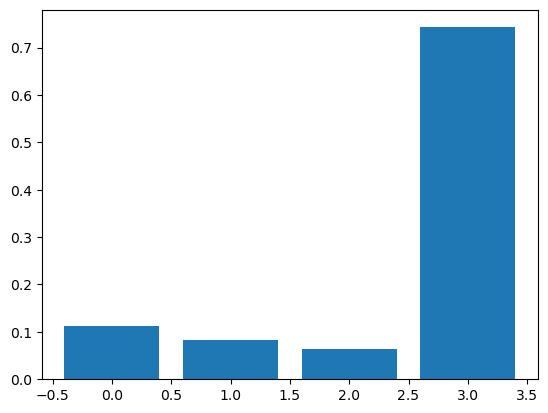

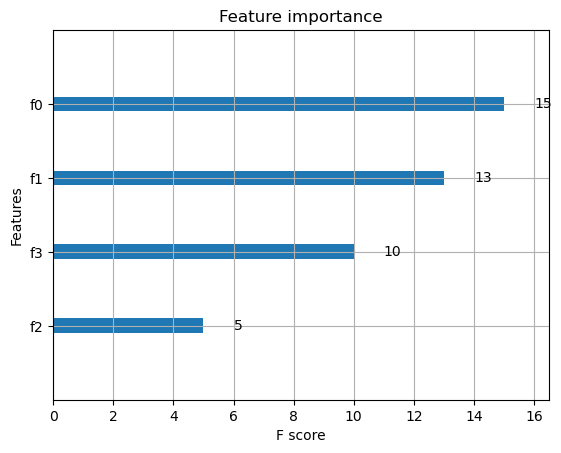

In [148]:
print(xgb.feature_importances_)
import matplotlib.pyplot as mp
mp.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
mp.show()

# plot feature importance
from xgboost import plot_importance
plot_importance(xgb)
mp.show()

In [149]:
dft = pd.read_csv("test.csv", index_col=0)
dft

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [150]:
le = LabelEncoder()
dft['Embarked'] = le.fit_transform(dft['Embarked'])
dft['Sex'] = le.fit_transform(dft['Sex'])
dft

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,2
1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0
1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2


In [152]:
dft = dft.apply(lambda col: LabelEncoder().fit_transform(dft["Embarked"]) if col.dtype == "object" else col)
dft.head(15)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,1,1,34.5,0,0,1,7.8292,1,1
893,3,2,0,47.0,1,0,2,7.0000,2,2
894,2,1,1,62.0,0,0,1,9.6875,1,1
895,3,2,1,27.0,0,0,2,8.6625,2,2
896,3,2,0,22.0,1,1,2,12.2875,2,2
897,3,2,1,14.0,0,0,2,9.2250,2,2
898,3,1,0,30.0,0,0,1,7.6292,1,1
899,2,2,1,26.0,1,1,2,29.0000,2,2
900,3,0,0,18.0,0,0,0,7.2292,0,0


In [153]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan, mean, std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
# load dataset
dft1 = dft.drop(columns={"Name","Cabin","Ticket"})
# split into input and output elements
data = dft1.values
ix = [i for i in range(data.shape[1]) if i != 9]
X, y = data[:, ix], data[:, 6]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
#define modeling pipeline
model = XGBClassifier(use_label_encoder=False, base_score=0.25, booster='gbtree', eta=0.3, max_depth=4, min_child_weight=20,
                    max_delta_step=0.5, subsample=0.6, colsample_bytree=1, colsample_bylevel=0.7, colsample_bynode=1, 
                    reg_lambda=1, reg_alpha=1, tree_method="approx", sketch_eps=0.1, scale_pos_weight=1.6, 
                    objective="binary:logitraw", gamma=0, n_estimators=10, rate_drop="0.01", skip_drop="0.8",
                    random_state = 262)# fit on the dataset
imputer.fit(X)
# transform the dataset
dft1 = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(dft1).flatten()))
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Missing: 87
Missing: 0
Mean Accuracy: 1.000 (0.000)


In [54]:
dft1 = dft.drop(columns={"Name","Cabin","Ticket"})
# split into input and output elements
data = dft1.values
ix = [i for i in range(data.shape[1]) if i != 9]
X, y = data[:, ix], data[:, 6]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
dft1 = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(dft1).flatten()))
dft1

Missing: 87


NameError: name 'KNNImputer' is not defined

In [154]:
dft1 = pd.DataFrame(dft1)
dft1

,0,1,2,3,4,5,6
0,3.0,1.0,34.500000,0.0,0.0,7.8292,1.0
1,3.0,0.0,47.000000,1.0,0.0,7.0000,2.0
2,2.0,1.0,62.000000,0.0,0.0,9.6875,1.0
3,3.0,1.0,27.000000,0.0,0.0,8.6625,2.0
4,3.0,0.0,22.000000,1.0,1.0,12.2875,2.0
...,...,...,...,...,...,...,...
413,3.0,1.0,25.224941,0.0,0.0,8.0500,2.0
414,1.0,0.0,39.000000,0.0,0.0,108.9000,0.0
415,3.0,1.0,38.500000,0.0,0.0,7.2500,2.0
416,3.0,1.0,25.224941,0.0,0.0,8.0500,2.0


In [155]:
dft1.columns = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
dftnew = dft1[["Pclass","Fare","Embarked","Sex"]]
print(dftnew.isnull().sum())
dftnew

Pclass      0
Fare        0
Embarked    0
Sex         0
dtype: int64


,Pclass,Fare,Embarked,Sex
0,3.0,7.8292,1.0,1.0
1,3.0,7.0000,2.0,0.0
2,2.0,9.6875,1.0,1.0
3,3.0,8.6625,2.0,1.0
4,3.0,12.2875,2.0,0.0
...,...,...,...,...
413,3.0,8.0500,2.0,1.0
414,1.0,108.9000,0.0,0.0
415,3.0,7.2500,2.0,1.0
416,3.0,8.0500,2.0,1.0


In [156]:
dftnew1 = mmsc.fit_transform(dftnew)
dftnew1

array([[1.        , 0.01528158, 0.5       , 1.        ],
       [1.        , 0.01366309, 1.        , 0.        ],
       [0.5       , 0.01890874, 0.5       , 1.        ],
       ...,
       [1.        , 0.01415106, 1.        , 1.        ],
       [1.        , 0.01571255, 1.        , 1.        ],
       [1.        , 0.0436405 , 0.        , 1.        ]])

In [157]:
y_pred_xgb = pd.DataFrame(np.round(xgb.predict(dftnew1),0))
y_pred_xgb.to_csv("xgb_xgbimpute3_fe.csv")